In [2]:
import cv2, matplotlib.pyplot as plt, numpy as np

In [3]:
image = cv2.imread("./sample.png")
type(image) # array of BGR values

numpy.ndarray

In [4]:
image.shape
# (height, width, channels)
# channels: 3 for RGB, 4 for RGBA, 1 for grayscale

(371, 850, 3)

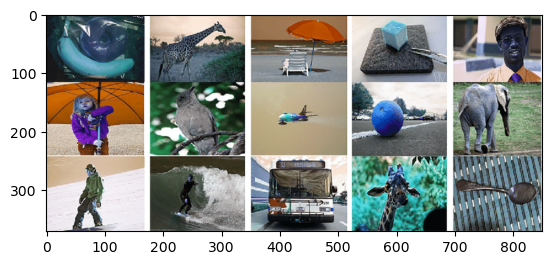

In [5]:
# opencv can't display images in jupyter notebook
plt.imshow(image)
# inverted colors

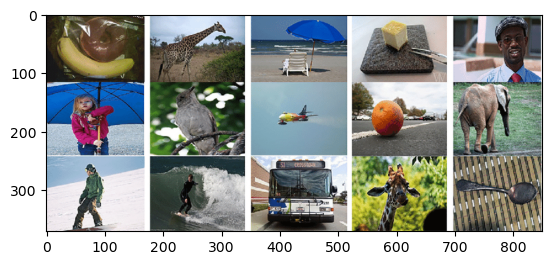

In [6]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert BGR to RGB
plt.imshow(new_image)

In [7]:
# splitting channels
r,g,b = cv2.split(new_image)
print('r', r.shape)
print('g', g.shape)
print('b', b.shape)

r (371, 850)
g (371, 850)
b (371, 850)


In [8]:
# merge image colors
merged_image = cv2.merge([r,g,b])

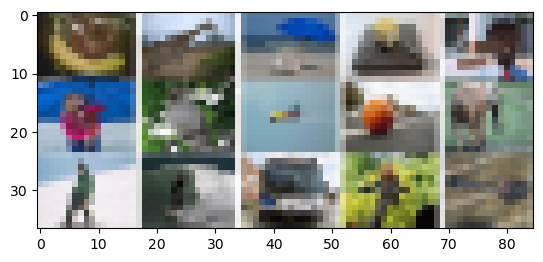

In [9]:
# resize the image
scale = 10
width = int(new_image.shape[1]*scale/100)
height = int(new_image.shape[0]*scale/100)
dim = (width, height)
resized_image = cv2.resize(new_image, dim, interpolation=cv2.INTER_AREA)
resized_image.shape
plt.imshow(resized_image)

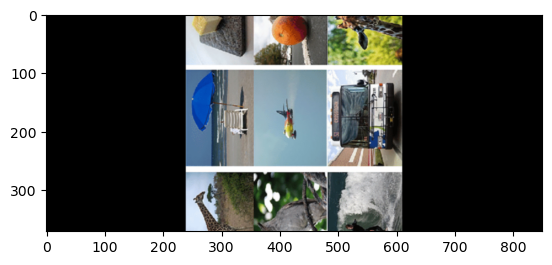

In [10]:
# rotate image
# get the height and width of the image
h,w = new_image.shape[:2]
center = (w/2, h/2)
angle = 90
# M is the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1.0)
# warpAffine applies the rotation matrix to the image
rotated_image = cv2.warpAffine(new_image, M, (w,h))
plt.imshow(rotated_image)

YOLO Model Train

In [11]:
# read the deep neural network weights and configuration files
yolo = cv2.dnn.readNet(".\\yolov3-tiny.weights", ".\\yolov3-tiny.cfg")

In [12]:
classes = []

with open(".\\coco.names", "r") as f:
    classes = f.read().splitlines()

print(classes[5:10])
print(len(classes))

['bus', 'train', 'truck', 'boat', 'traffic light']
80


In [40]:
img = cv2.imread(".\\sample_img.jpeg")

# convert bgr -> rgb
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)


In [41]:
print(blob.shape)
type(blob)

(1, 3, 320, 320)


numpy.ndarray

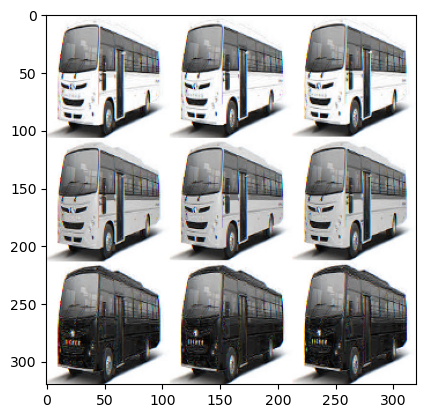

In [42]:
# to print img

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [43]:
# set the input to the network
yolo.setInput(blob)

In [44]:
# set output layers
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [37]:
# set bounding boxes to the blob
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidences = score[class_id]
        if confidences > 0.7:
            # object detected
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)

            # rectangle coordinates
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidences))
            class_ids.append(class_id)

In [38]:
len(boxes)

0

In [39]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

TypeError: Can't parse 'scores'. Input argument doesn't provide sequence protocol